# **Google PlayStore Data**

#### **Complete Exploratory Data Analysis**
- `Author`\
Shariq Nauman

- `E-mail`\
shariqnaumann@gmail.com

## **About Dataset**

- `Source`\
This dataset was taken from Kaggle using the following link: <https://www.kaggle.com/datasets/lava18/google-play-store-apps?resource=download>

- `Context`\
While many public datasets (on Kaggle and the like) provide Apple App Store data, there are not many counterpart datasets available for Google Play Store apps anywhere on the web. On digging deeper, I found out that iTunes App Store page deploys a nicely indexed appendix-like structure to allow for simple and easy web scraping. On the other hand, Google Play Store uses sophisticated modern-day techniques (like dynamic page load) using JQuery making scraping more challenging.

- `Content`\
Each app (row) has values for catergory, rating, size, and more.

- `Acknowledgements`\
This information is scraped from the Google Play Store. This app information would not be available without it.

- `Inspiration`\
The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market!

## **Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# This is for jupyter notebook to show the plot in the notebook itself instead of opening a new window for the plot
%matplotlib inline

## **Data Exploration & Cleaning**

 ↪ Load the csv file with the pandas library.
 
 ↪ Creating the dataframe and understanding the data present in the dataset using pandas.
 
 ↪ Dealing with the missing data, outliers and the incorrect records.

In [2]:
df = pd.read_csv('googleplaystore.csv')

- Viewing the first five Rows of the data.

In [3]:
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


> **Note**: Sometimes, the notebook does not present the complete output, therefore we can increase the limit of columns view and row view by using these commands: 

In [4]:
# Enabling the maximum rows & columns display option
pd.set_option('display.max_columns', None) # This is to display all the columns in the dataframe
pd.set_option('display.max_rows', None) # This is to display all the rows in the dataframe

# Disabling any unnecassary warnings for better representation
import warnings
warnings.filterwarnings('ignore')

- Lets see the exact column names which can be easily copied later on from Google Playstore Dataset.

In [5]:
columns = ''
for i in range(len(df.columns)):
    columns += df.columns[i] + ', '
print(f"The names of the columns are as follows: {columns[:len(columns)-2]}.")

The names of the columns are as follows: App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver.


- Lets have a look on the shape of the dataset.

In [6]:
print(f"This dataset contains {df.shape[0]} rows & {df.shape[1]} columns.")

This dataset contains 10841 rows & 13 columns.


- Not enough, lets have a look on the columns and their data types using detailed info function.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10841 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10839 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


### **Observations**
---
1. There are 10841 rows and 13 columns in the dataset.
2. The columns are of different data types.
3. The columns in the datasets are:
   - `'App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'`
4. There are some missing values in the dataset which we will read in detail and deal later on in the notebook.
5. There are some columns which are of object data type but they should be of numeric data type, we will convert them later on in the notebook.
   - `'Size', 'Installs', 'Price'`
---

In [8]:
df.describe()

,Rating,Reviews
count,9367.000000,1.084100e+04
mean,4.191513,4.441119e+05
std,0.515735,2.927629e+06
min,1.000000,0.000000e+00
25%,4.000000,3.800000e+01
50%,4.300000,2.094000e+03
75%,4.500000,5.476800e+04
max,5.000000,7.815831e+07


### **Observations**
---
- We have only 2 columns as numeric data type, rest all are object data type (according to python), but we can see that `'Size', 'Installs', 'Price'` are also numeric, we must convert them to numeric data type in data wrangling process.
---

- Let's clean the `Size` column first

In [9]:
# Counting the number of missing values in the column
df['Size'].isnull().sum()

np.int64(0)

- There are no missing values, so we are good to go.

In [10]:
# Check unique values
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

-  There are several uniques values in the `Size` column, we have to first convert each unit into one common unit (megabytes) for all values, and then remove the `M` and `k` from the values and convert them into numeric data type.

In [11]:
# Counting the number of values that contain 'k' in them
df['Size'].loc[df['Size'].str.contains('k')].value_counts().sum()

np.int64(316)

In [12]:
# Counting the number of values that contain 'M' in them
df['Size'].loc[df['Size'].str.contains('M')].value_counts().sum()

np.int64(8830)

In [13]:
# Counting the number of values that contain 'Varies with device' in them
df['Size'].loc[df['Size'].str.contains('Varies with device')].value_counts().sum()

np.int64(1695)

In [14]:
# Taking sum of all the values in size column which has 'M', 'K' and 'varies with device' in it and also verifying it
316+8830+1695 == len(df)

True

- We have `8830` values that have `M` unit.
- We have `316` values that have `k` unit.
- We have `1695` values of `Varies with device`.

> Let's convert the `k` units into megabytes and then remove the `M` and `k` from the values and convert them into numeric data type.

In [15]:
# Convert the size column to numeric by dividing the values with 1024 if it has 'k' in it
def convert_to_mb(size):
    if 'k' in size:
        return float(size.replace('k', '')) / 1024
    elif 'M' in size:
        return float(size.replace('M', ''))
    else:
        return np.nan  # Return NaN for unknown values

# Applying the convert function to the Size column
df['Size'] = df['Size'].apply(convert_to_mb)

In [16]:
# Converting the object data type into numeric (float) data type
df['Size'] = pd.to_numeric(df['Size'], errors='coerce')
df['Size'].dtype

dtype('float64')

In [17]:
# Renaming the Size column
df.rename(columns={'Size': 'Size (MB)'}, inplace=True)

- Now we have converted every value into megabytes and removed the `M` and `K` from the values and converted them into numeric data type.
- 'Varies with device' was a string value, therefore we intentionally converted them into null values, which we can fill later on according to our needs.

---
- Lets have a look on the `Installs` column.

In [18]:
# Check the unique values in size column
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [19]:
# Lets have a values counts
df['Installs'].value_counts()

Installs
1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             908
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Name: count, dtype: int64

In [20]:
# Counting the number of missing values in the column
df['Installs'].isnull().sum()

np.int64(0)

In [21]:
# Find how many values has '+' in it
df['Installs'].loc[df['Installs'].str.contains('\+')].value_counts().sum()

np.int64(10840)

- The only problem I see here is the `+` and `,` signs.
- The total values in the `Installs` column are `10841` and there are no null values in the column.
- However, one value `0` has no plus sign.

- Let's remove the plus sign `+` and `,` from the values and convert them into numeric data type

In [22]:
# Remove the plus sign from install column and convert it to numeric
df['Installs'] = df['Installs'].str.replace('+', '')
# Also remove the commas from the install column
df['Installs'] = df['Installs'].str.replace(',', '')
# convert the install column to numeric (integers because this is the number of installs/count)
df['Installs'] = df['Installs'].astype('int64')

- Lets verify if the datatype has been changed and the `+` and `,` sign have been removed.

In [23]:
df.head() # Check the head of the dataframe

,App,Category,Rating,Reviews,Size (MB),Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [24]:
df['Installs'].dtype # This will show the data type of the column

dtype('int64')

- We can generate a new column based on the installation values, which will be helpful in our analysis.

In [25]:
df['Installs'].max() # This will show the maximum value of the column

np.int64(1000000000)

In [26]:
# Binning the Installs column to make categories and storing them in a new column 'Installs_Category'
bins = [-1, 0, 100, 1000, 10000, 100000, 1000000, 10000000, 100000000, 1000000000]
labels = ['Zero', 'Very Low', 'Low', 'Medium', 'High', 'Very High', 'Extreme High', 'Ultra High', 'Huge']
df['Installs_Category'] = pd.cut(df['Installs'], bins=bins, labels=labels)

In [27]:
# Lets have a values counts of each category in 'Installs_Category'
df['Installs_Category'].value_counts()

Installs_Category
Very High       2118
Extreme High    2004
High            1648
Medium          1531
Very Low        1459
Low             1238
Ultra High       698
Huge             130
Zero              15
Name: count, dtype: int64

- Lets a look at the `Price` column.

In [28]:
# Check the unique values in the column
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [29]:
# Counting the number of missing values in the column
df['Price'].isnull().sum()

np.int64(0)

- There no missing/null values so we are good to go.

In [30]:
# Check the value counts of the column
df['Price'].value_counts()

Price
0          10041
$0.99        148
$2.99        129
$1.99         73
$4.99         72
$3.99         63
$1.49         46
$5.99         30
$2.49         26
$9.99         21
$6.99         13
$399.99       12
$14.99        11
$4.49          9
$29.99         7
$3.49          7
$7.99          7
$24.99         7
$5.49          6
$19.99         6
$6.49          5
$8.99          5
$12.99         5
$11.99         5
$10.00         3
$1.00          3
$16.99         3
$2.00          3
$17.99         2
$10.99         2
$9.00          2
$79.99         2
$7.49          2
$3.95          2
$33.99         2
$1.70          2
$13.99         2
$8.49          2
$39.99         2
$1.50          1
$25.99         1
$74.99         1
$15.99         1
$3.88          1
$1.76          1
$3.02          1
$400.00        1
$4.84          1
$2.50          1
$1.59          1
$1.61          1
$4.77          1
$5.00          1
$1.29          1
$379.99        1
$299.99        1
$37.99         1
$18.99         1
$389.99 

- We need to confirm if the values in the `Price` column are only with $ sign or not.

In [31]:
# Counting the number of values in the 'Price' column that have $ in it
df['Price'].str.startswith('$').sum()

np.int64(800)

In [32]:
# Counting the number of values in the 'Price' column that do not have $ in it
df['Price'].str.startswith('0').sum()

np.int64(10041)

- Now we can confirm that the only currency used is `$` in the `Price` column, as `800+10041=10841 values`, which is equal to the total number of rows in the dataframe.
- The only problem is $ sign let's remove it and convert the column into numeric data type.

In [33]:
# Removing the $ sign from the 'Price' column and converting it to numeric (float) data type
df['Price'] = df['Price'].str.replace('$', '')
df['Price'] = df['Price'].astype('float64')

In [34]:
# Check the data type of the column
df['Price'].dtype

dtype('float64')

In [35]:
# Displaying the minimum, maximum and average (mean) price of the apps
df['Price'].agg(['min', 'max', 'mean'])

min       0.000000
max     400.000000
mean      1.027273
Name: Price, dtype: float64

### **Descriptive Statistics**

In [36]:
df.describe()

,Rating,Reviews,Size (MB),Installs,Price
count,9367.000000,1.084100e+04,9146.000000,1.084100e+04,10841.000000
mean,4.191513,4.441119e+05,21.514141,1.546291e+07,1.027273
std,0.515735,2.927629e+06,22.588679,8.502557e+07,15.948971
min,1.000000,0.000000e+00,0.008301,0.000000e+00,0.000000
25%,4.000000,3.800000e+01,4.900000,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,13.000000,1.000000e+05,0.000000
75%,4.500000,5.476800e+04,30.000000,5.000000e+06,0.000000
max,5.000000,7.815831e+07,100.000000,1.000000e+09,400.000000


### **Observations**
---
- Now, we have only 5 columns as numeric data type.
- We can observe their descriptive statistics. and make tons of observations as per our hypotheses.
- We can see that the `Rating` column has a minimum value of `1` and a maximum value of `5`, which is the range of rating, and the mean is `4.19` which is a good rating. On an average people give this rating.
- We can see that the `Reviews` column has a minimum value of `0` and a maximum value of `78,158,306` (78+ Million), which is the range of reviews, and the mean is `444,111.93` which is a good number of reviews. On an average people give this number of reviews to the apps. But it does not make sense to us, as we have different categories of apps.
- Similarly, we can observe the other columns as well.

Therefore, the most important thing is to classify as app based on the correlation matrix and then observe the descriptive statistics of the app category and number of installs, reviews, ratings, etc.

But even before that we have to think about the missing values in the dataset.

---

### **Dealing with missing values**
Dealing with the missing values is one of the most important part of the data wrangling process, we must deal with the missing values in order to get the correct insights from the data.

- Lets have a look on the missing values in the dataset.

In [37]:
# Counting the number of missing values in each column of the dataframe and displaying them in descending order
df.isnull().sum().sort_values(ascending=False)

Size (MB)            1695
Rating               1474
Current Ver             8
Android Ver             2
Category                1
Type                    1
Genres                  1
Installs                0
App                     0
Reviews                 0
Content Rating          0
Price                   0
Last Updated            0
Installs_Category       0
dtype: int64

In [38]:
# Total number of missing values in the dataframe
df.isnull().sum().sum()

np.int64(3182)

In [39]:
# Percentage of missing values in each column and displaying them in descending order
(df.isnull().sum() / len(df) * 100).sort_values(ascending=False)

Size (MB)            15.635089
Rating               13.596532
Current Ver           0.073794
Android Ver           0.018448
Category              0.009224
Type                  0.009224
Genres                0.009224
Installs              0.000000
App                   0.000000
Reviews               0.000000
Content Rating        0.000000
Price                 0.000000
Last Updated          0.000000
Installs_Category     0.000000
dtype: float64

- Lets plot the missing values on a heatmap.

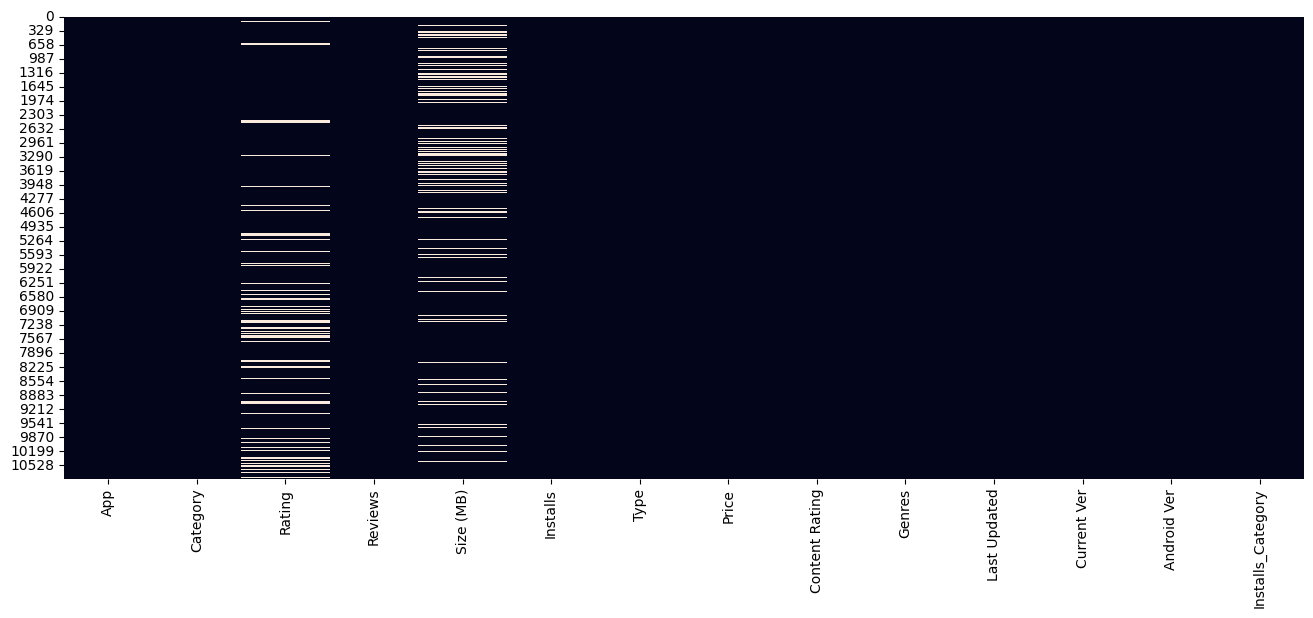

In [40]:
# setting the figure size
plt.figure(figsize=(16, 6))
# plotting the missing values on a heatmap using seaborn
sns.heatmap(df.isnull(), cbar=False)
# displaying the plot
plt.show()

- Now, lets plot the missing values by their percentage on a bar plot.

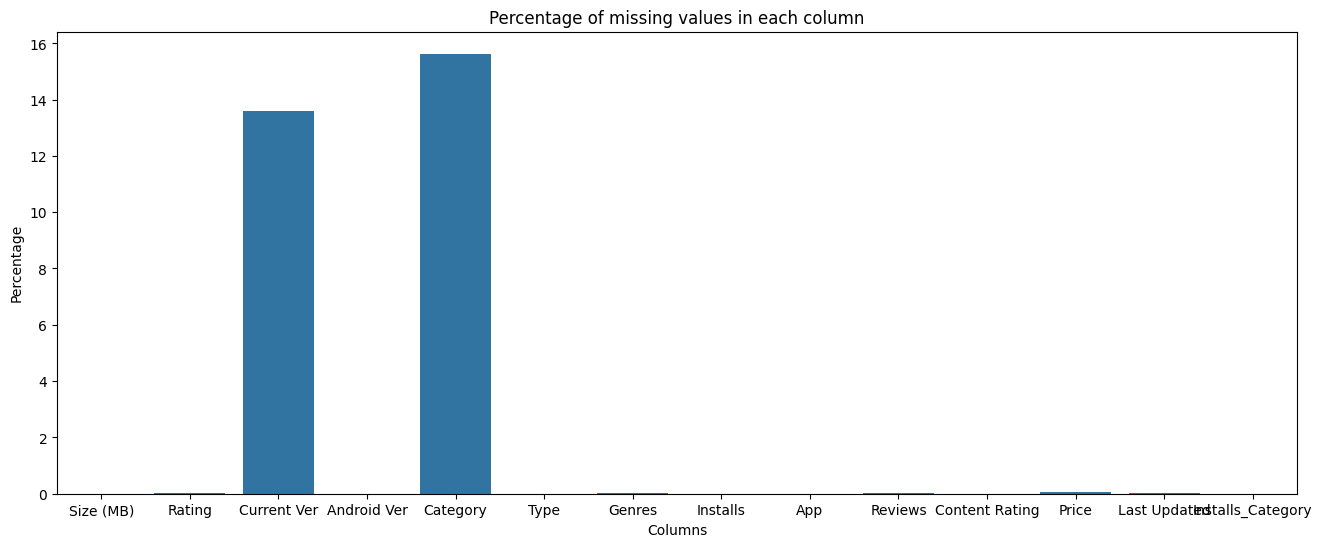

In [41]:
# setting figure size
plt.figure(figsize=(16, 6))
# plotting the missing values by their percentage on a bar plot
sns.barplot(x=(df.isnull().sum() / len(df) * 100).sort_values(ascending=False).index, y=df.isnull().sum() / len(df) * 100)
plt.xlabel('Columns')
plt.ylabel('Percentage')
plt.title('Percentage of missing values in each column')
# displaying the plot
plt.show()


- We have missing percentage columns that have less than one percent of missing values, we will plot them as follows:

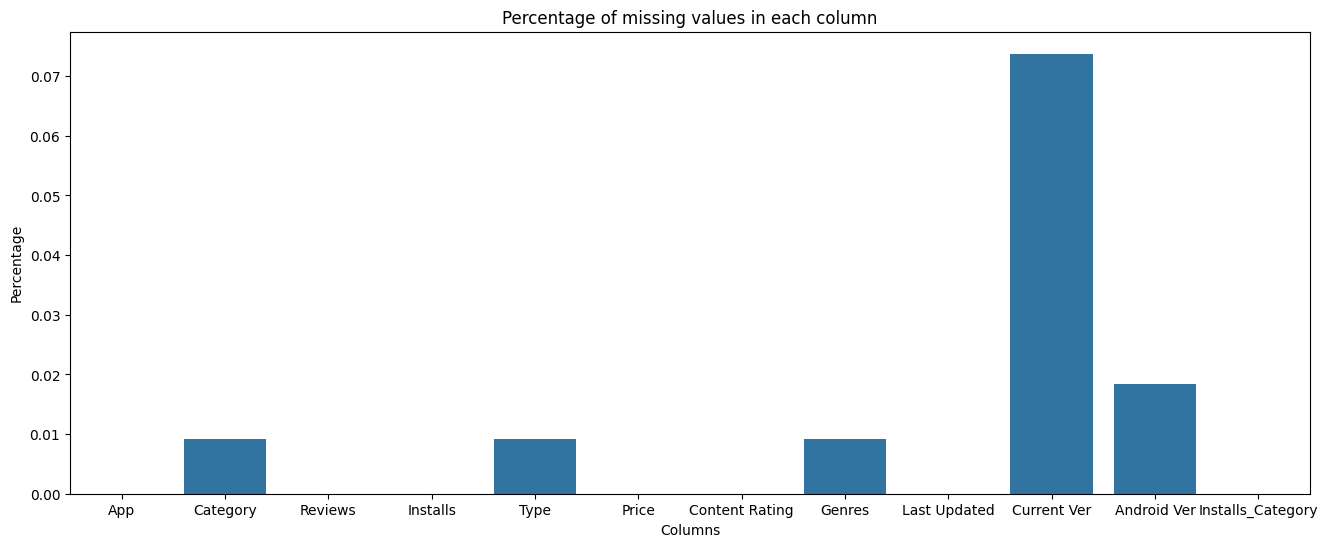

In [42]:
# setting the figure size
plt.figure(figsize=(16, 6))
# plotting the missing values of the columns that have percentage less than 1 on a bar plot
sns.barplot(x=(df.isnull().sum() / len(df) * 100)[(df.isnull().sum() / len(df) * 100) < 1].index, y=(df.isnull().sum() / len(df) * 100)[(df.isnull().sum() / len(df) * 100) < 1])
plt.xlabel('Columns')
plt.ylabel('Percentage')
plt.title('Percentage of missing values in each column')
# displaying the plot
plt.show()

### **Observations**
---
- We have 1695 missing values in the `'Size_in_bytes'` and `'Size_in_Mb'` columns, which is 15.6% of the total values in the column.
- We have 1474 missing values in the `'Rating'` column, which is 13.6% of the total values in the column.
- We have 8 missing value in the `'Current Ver'` column, which is 0.07% of the total values in the column.
- We have 2 missing values in the `'Android Ver'` column, which is 0.01% of the total values in the column.
- We have only 1 missing value in `Category`, `Type` and `Genres` columns, which is 0.009% of the total values in the column.

---

- We can not impute the `Rating` column as it is directly linked with the `Installs` column. To test this Hypothesis, we need to plot the `Rating` column with the `Installs` and `Size` columns and statistically test it using `pearson correlation test`.

- Lets run the correlations.

In [43]:
# Displays the numeric columns with their summary statistics
df.describe()

,Rating,Reviews,Size (MB),Installs,Price
count,9367.000000,1.084100e+04,9146.000000,1.084100e+04,10841.000000
mean,4.191513,4.441119e+05,21.514141,1.546291e+07,1.027273
std,0.515735,2.927629e+06,22.588679,8.502557e+07,15.948971
min,1.000000,0.000000e+00,0.008301,0.000000e+00,0.000000
25%,4.000000,3.800000e+01,4.900000,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,13.000000,1.000000e+05,0.000000
75%,4.500000,5.476800e+04,30.000000,5.000000e+06,0.000000
max,5.000000,7.815831e+07,100.000000,1.000000e+09,400.000000


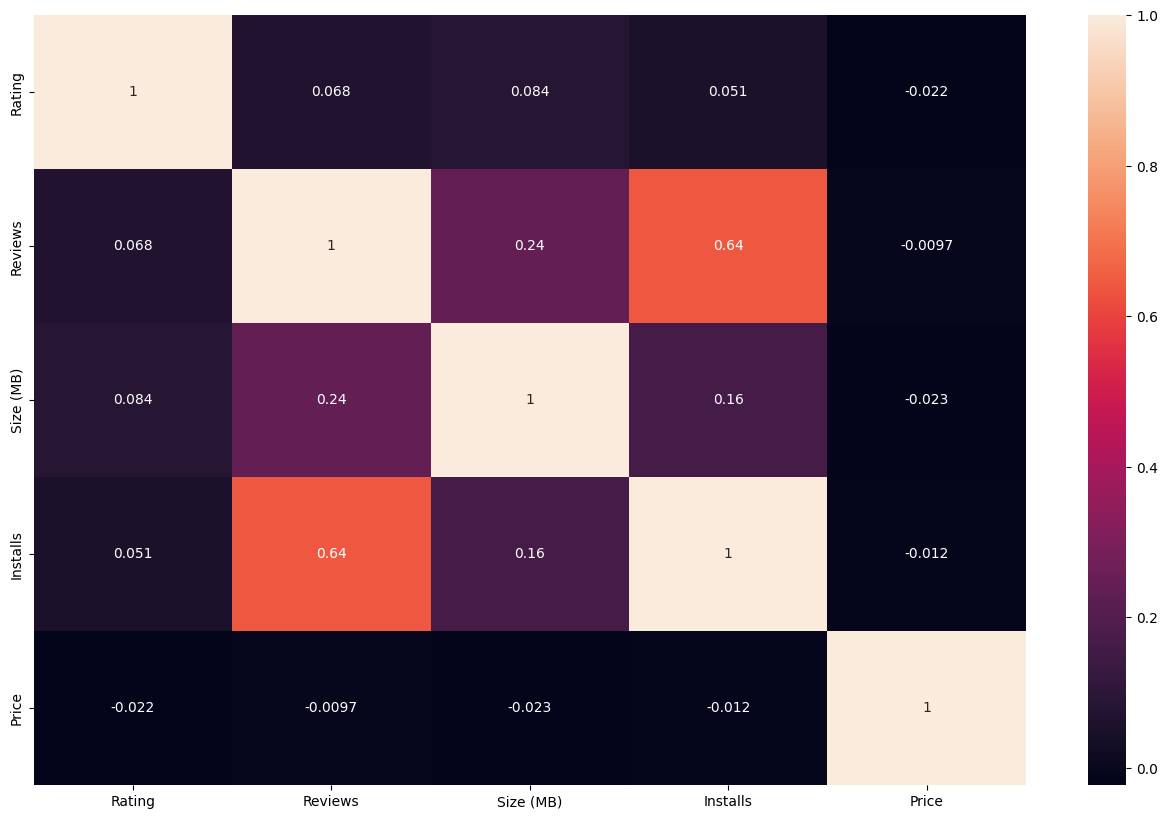

In [44]:
# Making a correlation matrix of numeric columns on a heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True)
plt.show()

In [45]:
# Displaying the correlation matrix in the tabulated format
df.select_dtypes(include='number').corr()

,Rating,Reviews,Size (MB),Installs,Price
Rating,1.000000,0.068147,0.084098,0.051393,-0.021851
Reviews,0.068147,1.000000,0.238218,0.643123,-0.009666
Size (MB),0.084098,0.238218,1.000000,0.164794,-0.023000
Installs,0.051393,0.643123,0.164794,1.000000,-0.011688
Price,-0.021851,-0.009666,-0.023000,-0.011688,1.000000


In [46]:
# We can calculate the pearson correlation coefficient using scipy
from scipy import stats

# Remove rows containing NaN or infinite values (Important to calculate Pearson's R)
df_clean = df.dropna()

# calculate Pearson's R between Rating and Installs
pearson_r, _ = stats.pearsonr(df_clean['Reviews'], df_clean['Installs'])
print(f"Pearson's R between Reviews and Installs: {pearson_r:.4f}")

Pearson's R between Reviews and Installs: 0.6262


### **Observations**
---
- Lighter color shows the high correlation and darker color shows the low correlation.
- We can see that the `Reviews` column has a high correlation with the `Installs` column, which is `0.64` according to corr(), which is quite good.
  - This shows that the more the reviews the more the installs are for one app. If in any case we need to impute reviews we have to think of number of install.
  - If we have an app with `2` installs and we impute the reviews with `1000` or via average reviews then it will be wrong.
- Installs is slightly correlated with `Size (MB)`, which is `0.16`, this also shows us the importance of Size and Installs. But we can not depend on it as the Pearson correlation is very low.
---

- Before going ahead, let's remove the rows with missing values in the `Current Ver`, `Android Ver`, `Category`, `Type` and `Genres` columns, as they are very less in number and will not affect our analysis.

In [47]:
# Length beofre removing the null values
print(f"Length of the dataframe before removing the null values: {len(df)}")

Length of the dataframe before removing the null values: 10841


In [48]:
# Removing the rows having null values in 'Cureent Ver', 'Android Ver', 'Genres', 'Category' and 'Type' columns
df.dropna(subset=['Current Ver', 'Android Ver', 'Genres', 'Category', 'Type'], inplace=True)

In [49]:
# Length after removing the null values
print(f"Length of the dataframe after removing the null values: {len(df)}")

Length of the dataframe after removing the null values: 10829


- We have removed `12` rows having null values in the `Current Ver`, `Android Ver`, `Category`, `Type` and `Genres` columns.

In [50]:
# Lets check the null values again
df.isnull().sum().sort_values(ascending=False)

Size (MB)            1694
Rating               1469
Category                0
App                     0
Reviews                 0
Installs                0
Type                    0
Price                   0
Content Rating          0
Genres                  0
Last Updated            0
Current Ver             0
Android Ver             0
Installs_Category       0
dtype: int64

### **Observations**
---
- Only `Rating` and `Size (MB)` columns are left with missing values.
  - We know that we have to be carefull while deadling with `Rating` column, as it is directly linked with the `Installs` column.
  - In Size columns, we already know about `Varies with device` values, which we have converted into null values, we do not need to impute at the moment, as every app has different size and nobody can predict that as accurately as possible.
---

In [51]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size (MB)', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Installs_Category'],
      dtype='object')

In [52]:
# Find the trend of 'Rating' in each 'Insalls_Category'
df.groupby('Installs_Category')['Rating'].describe()

,count,mean,std,min,25%,50%,75%,max
Installs_Category,,,,,,,,
Zero,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Very Low,446.0,4.420179,0.878608,1.0,4.2,4.8,5.0,5.0
Low,913.0,4.090581,0.789222,1.0,3.8,4.3,4.7,5.0
Medium,1440.0,4.035417,0.604428,1.4,3.8,4.2,4.5,5.0
High,1616.0,4.093255,0.505619,1.6,3.9,4.2,4.5,4.9
Very High,2113.0,4.207525,0.376594,1.8,4.0,4.3,4.5,4.9
Extreme High,2004.0,4.287076,0.294902,2.0,4.1,4.3,4.5,4.9
Ultra High,698.0,4.386533,0.192817,3.1,4.3,4.4,4.5,4.8
Huge,130.0,4.309231,0.186126,3.7,4.2,4.3,4.4,4.7


In [53]:
df['Rating'].isnull().sum()

np.int64(1469)

In [54]:
# In which Install_category the Rating has NaN values
df['Installs_Category'].loc[df['Rating'].isnull()].value_counts()

Installs_Category
Very Low        1011
Low              322
Medium            88
High              31
Zero              14
Very High          3
Extreme High       0
Ultra High         0
Huge               0
Name: count, dtype: int64

- Let's plot this and have a look.

Text(8, 3.5, 'Null values: 0')

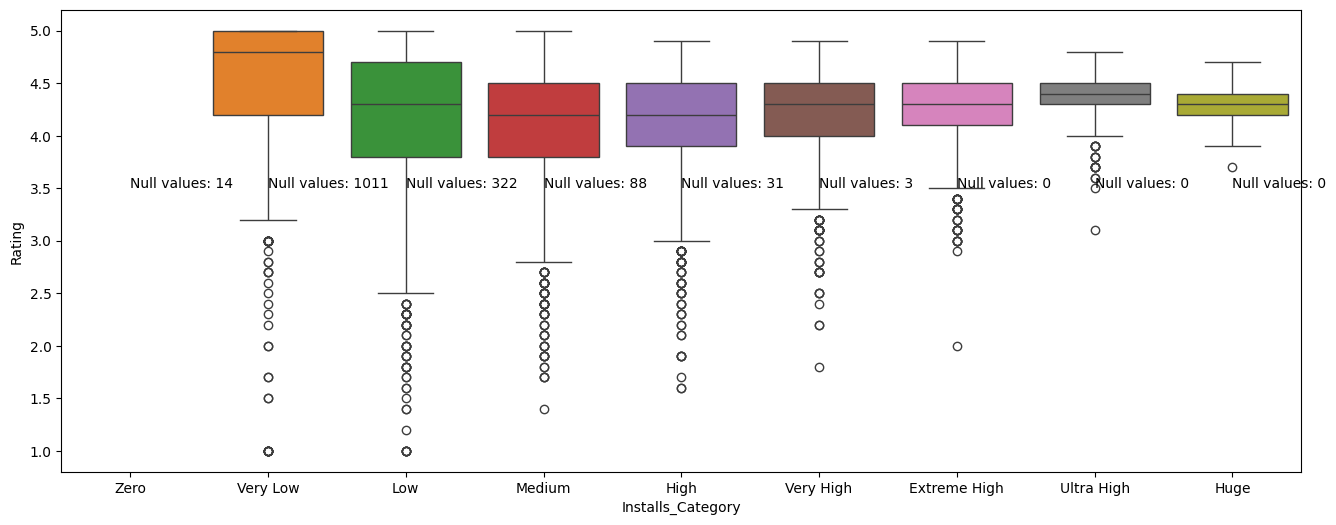

In [55]:
# Plot the boxplot of Rating in each Installs_category
plt.figure(figsize=(16, 6)) # make figure size
sns.boxplot(x='Installs_Category', y='Rating', hue='Installs_Category', data=df) # plot the boxplot

# Add the text of number of null values in each category
plt.text(0, 3.5, 'Null values: 14')
plt.text(1, 3.5, 'Null values: 1011')
plt.text(2, 3.5, 'Null values: 322')
plt.text(3, 3.5, 'Null values: 88')
plt.text(4, 3.5, 'Null values: 31')
plt.text(5, 3.5, 'Null values: 3')
plt.text(6, 3.5, 'Null values: 0')
plt.text(7, 3.5, 'Null values: 0')
plt.text(8, 3.5, 'Null values: 0')

- Let's check if there is any similar link with Reviews as well

In [56]:
# In which Install_category the Reviews has NaN values
df['Installs_Category'].loc[df['Reviews'].isnull()].value_counts()

Installs_Category
Zero            0
Very Low        0
Low             0
Medium          0
High            0
Very High       0
Extreme High    0
Ultra High      0
Huge            0
Name: count, dtype: int64

- There are no Null values in Reviews.

<Axes: xlabel='Installs_Category', ylabel='Reviews'>

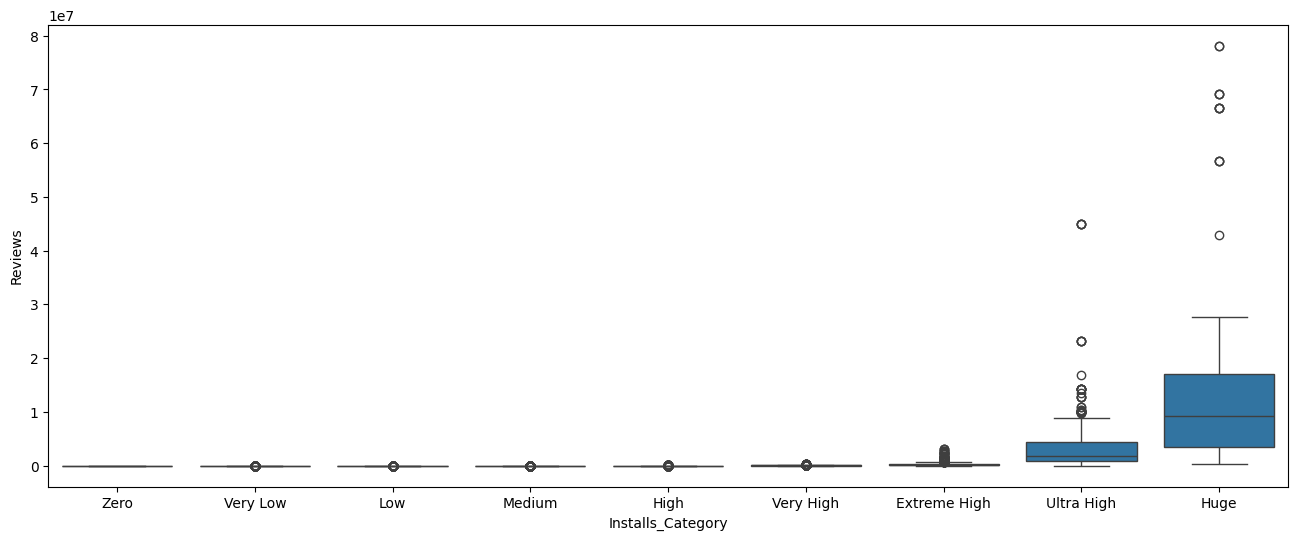

In [57]:
# Let's plot the same plots for Reviews column as well
plt.figure(figsize=(16, 6)) # make figure size
sns.boxplot(x='Installs_Category', y= 'Reviews', data=df) # plot the boxplot

- The data looks really imbalance, let's normalize the data using log transformation.

<Axes: xlabel='Installs_Category', ylabel='Reviews'>

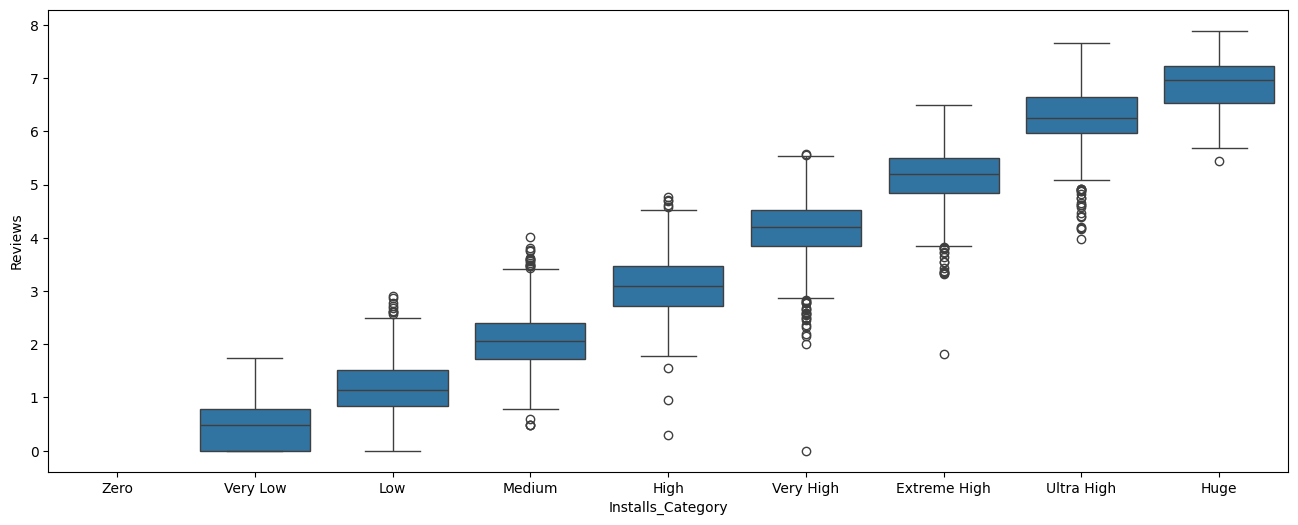

In [58]:
plt.figure(figsize=(16, 6)) # make figure size
sns.boxplot(x='Installs_Category', y= np.log10(df['Reviews']), data=df) # plot the boxplot

- We also draw the scatter plot of the `Rating` and `Review` columns with the `Installs` column.

<Axes: xlabel='Rating', ylabel='Reviews'>

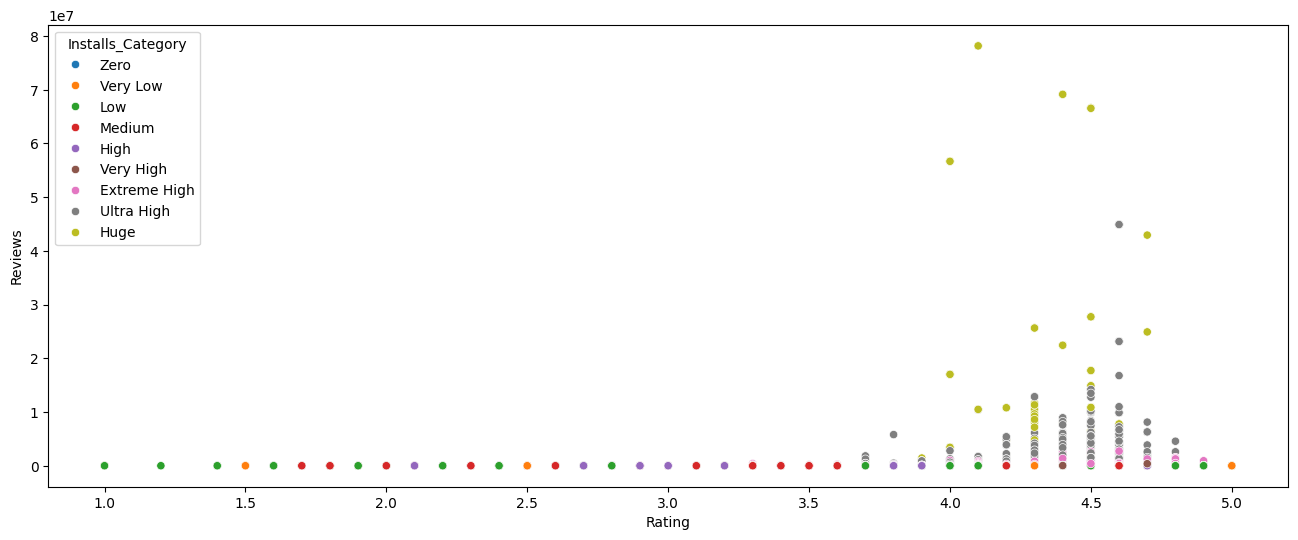

In [59]:
# Draw a scatter plot between Rating, Reviews and Installs
plt.figure(figsize=(16, 6)) # make figure size
sns.scatterplot(x='Rating', y='Reviews', hue='Installs_Category', data=df) # plot the scatter plot

- It doesn't show any trend, because, you should know that Rating is a categorical variable (Ordinal) and Reviews is a continuous variable, therefore, we can not plot them together.
- Let's try with Reviews and Installs

<Axes: xlabel='Reviews', ylabel='Installs'>

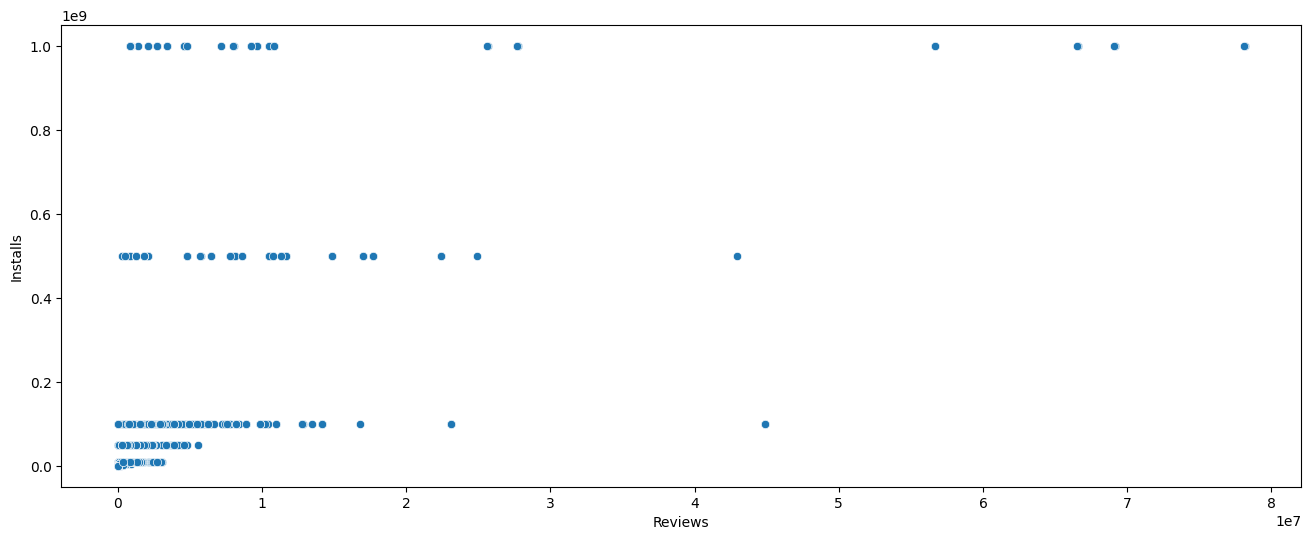

In [60]:
# Plot reviews and installs in a scatter plot
plt.figure(figsize=(16, 6)) # make figure size
sns.scatterplot(x='Reviews', y='Installs', data=df) # plot the scatter plot

- We did not see any trend and the issue is we need to normalize the data before plotting it, let's try with log transformation.

<Axes: xlabel='Reviews', ylabel='Installs'>

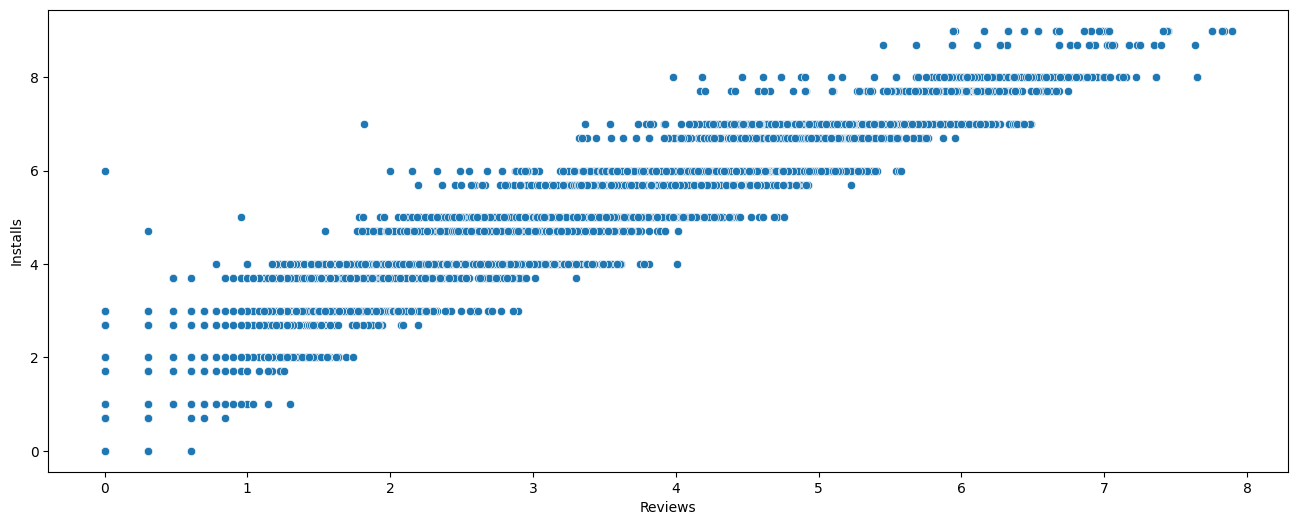

In [61]:
# Plot reviews and installs in a scatter plot
plt.figure(figsize=(16, 6)) # make figure size
sns.scatterplot(x=np.log10(df['Reviews']), y=np.log10(df['Installs']), data=df) # plot the scatter plot

- Now we see a slight trend but still the issue is installs were given in a factorial manner such as 10+, 20+, 1000+ etc, and these are not continuous, instead they are discrete, therefore, we can only see a slight trend here. Let's plot a line plot to see the trend.

<Figure size 1600x600 with 0 Axes>

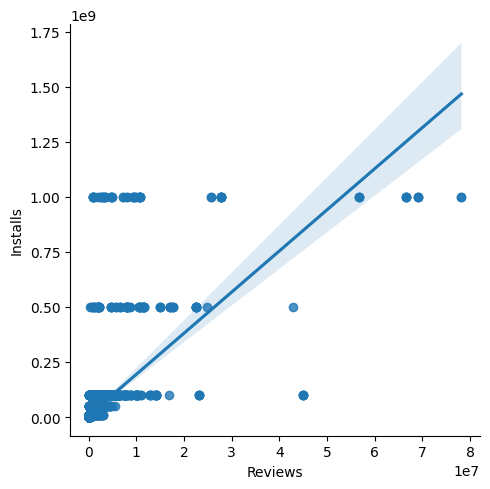

In [62]:
# Plot reviews and installs in a scatter plot with trend line
plt.figure(figsize=(16, 6)) # make figure size
sns.lmplot(x='Reviews', y='Installs', data=df) # plot the scatter plot with trend line


- Here, we can see a nice trend, which shows that number of Reviews increases with the number of Installs, which is quite obvious.

### **Observation**
---
- We can see that most of the null values from `Rating` column are No - Moderate Installation apps, which make sense that if the app has less installations, it has less Rating and Reviews.

---

- But wait, we have to check for the duplicates as well, as they can affect our analysis.

### **Duplicates**

* Removing duplicates is one of the most important part of the data wrangling process, we must remove the duplicates in order to get the correct insights from the data.
* If you do not remove duplicates from a dataset, it can lead to incorrect insights and analysis. 
* Duplicates can skew statistical measures such as mean, median, and standard deviation, and can also lead to over-representation of certain data points. 
* It is important to remove duplicates to ensure the accuracy and reliability of your data analysis.


In [63]:
# Find duplicate if any
df.duplicated().sum()

np.int64(483)

This shows us total duplicates, but we can also check based on the app name, as we know that every app has a unique name.

In [64]:
# Find duplicate if any in the 'App' column
df['App'].duplicated().sum()

np.int64(1181)

- Oops! we have 1181 dupicate app names.
- Can we find a column which can help us to remove the duplicates?

Let's check for number of duplicates in each column using a for loop and print the output.

In [65]:
# Let's check for number of duplicates
for col in df.columns:
    print(f"Number of duplicates in {col} column are: {df[col].duplicated().sum()}")

Number of duplicates in App column are: 1181
Number of duplicates in Category column are: 10796
Number of duplicates in Rating column are: 10789
Number of duplicates in Reviews column are: 4830
Number of duplicates in Size (MB) column are: 10373
Number of duplicates in Installs column are: 10809
Number of duplicates in Type column are: 10827
Number of duplicates in Price column are: 10737
Number of duplicates in Content Rating column are: 10823
Number of duplicates in Genres column are: 10710
Number of duplicates in Last Updated column are: 9453
Number of duplicates in Current Ver column are: 7998
Number of duplicates in Android Ver column are: 10796
Number of duplicates in Installs_Category column are: 10820


- Find and watch all duplicates if they are real!

In [66]:
# Find exact duplicates and print them
df[df['App'].duplicated(keep=False)].sort_values(by='App').head(19)

,App,Category,Rating,Reviews,Size (MB),Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs_Category
1393,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3.8,500000,Free,0.00,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up,Very High
1407,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3.8,500000,Free,0.00,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up,Very High
2543,1800 Contacts - Lens Store,MEDICAL,4.7,23160,26.0,1000000,Free,0.00,Everyone,Medical,"July 27, 2018",7.4.1,5.0 and up,Very High
2322,1800 Contacts - Lens Store,MEDICAL,4.7,23160,26.0,1000000,Free,0.00,Everyone,Medical,"July 27, 2018",7.4.1,5.0 and up,Very High
2385,2017 EMRA Antibiotic Guide,MEDICAL,4.4,12,3.8,1000,Paid,16.99,Everyone,Medical,"January 27, 2017",1.0.5,4.0.3 and up,Low
2256,2017 EMRA Antibiotic Guide,MEDICAL,4.4,12,3.8,1000,Paid,16.99,Everyone,Medical,"January 27, 2017",1.0.5,4.0.3 and up,Low
1337,21-Day Meditation Experience,HEALTH_AND_FITNESS,4.4,11506,15.0,100000,Free,0.00,Everyone,Health & Fitness,"August 2, 2018",3.0.0,4.1 and up,High
1434,21-Day Meditation Experience,HEALTH_AND_FITNESS,4.4,11506,15.0,100000,Free,0.00,Everyone,Health & Fitness,"August 2, 2018",3.0.0,4.1 and up,High
3083,365Scores - Live Scores,SPORTS,4.6,666521,25.0,10000000,Free,0.00,Everyone,Sports,"July 29, 2018",5.5.9,4.1 and up,Extreme High
5415,365Scores - Live Scores,SPORTS,4.6,666246,25.0,10000000,Free,0.00,Everyone,Sports,"July 29, 2018",5.5.9,4.1 and up,Extreme High


- Remove Duplicates.

In [67]:
# Remove the duplicates from app column
df.drop_duplicates(subset='App', keep='first', inplace=True)

In [68]:
# Print the number of rows and columns after removing duplicates
print(f"Number of rows after removing duplicates: {df.shape[0]}")

Number of rows after removing duplicates: 9648


- Now we have removed 1181 duplicates from the dataset, and have 9648 rows left.

---

## **Insights from Data**

### **1. Which category has the highest number of apps?**

In [69]:
# Which category has highest number of apps
df['Category'].value_counts().head(10) # this will show the top 10 categories with highest number of apps

Category
FAMILY             1828
GAME                959
TOOLS               825
BUSINESS            420
MEDICAL             395
PRODUCTIVITY        374
PERSONALIZATION     374
LIFESTYLE           369
FINANCE             345
SPORTS              325
Name: count, dtype: int64

### **2. Which category has the highest number of installs?**

In [70]:
# Category with highest number of Installs
df.groupby('Category')['Installs'].sum().sort_values(ascending=False).head(10)

Category
GAME                  13878924415
COMMUNICATION         11038276251
TOOLS                  8001271905
PRODUCTIVITY           5793091369
SOCIAL                 5487867902
PHOTOGRAPHY            4649147655
FAMILY                 4427881405
VIDEO_PLAYERS          3926902720
TRAVEL_AND_LOCAL       2894887146
NEWS_AND_MAGAZINES     2369217760
Name: Installs, dtype: int64

### **3. Which category has the highest number of reviews?**

In [71]:
# Category with highest number of Reviews
df.groupby('Category')['Reviews'].sum().sort_values(ascending=False).head(10)

Category
GAME               622298709
COMMUNICATION      285811368
TOOLS              229352567
SOCIAL             227927801
FAMILY             143825265
PHOTOGRAPHY        105351270
VIDEO_PLAYERS       67484568
PRODUCTIVITY        55590649
PERSONALIZATION     53542661
SHOPPING            44551730
Name: Reviews, dtype: int64

### **4. Which category has the highest rating?**

In [72]:
# Category with highest average Rating
df.groupby('Category')['Rating'].mean().sort_values(ascending=False).head(10)

Category
EVENTS                 4.435556
ART_AND_DESIGN         4.376667
EDUCATION              4.364407
BOOKS_AND_REFERENCE    4.344970
PERSONALIZATION        4.331419
PARENTING              4.300000
BEAUTY                 4.278571
GAME                   4.247368
SOCIAL                 4.247291
WEATHER                4.243056
Name: Rating, dtype: float64

<Axes: xlabel='Rating', ylabel='Density'>

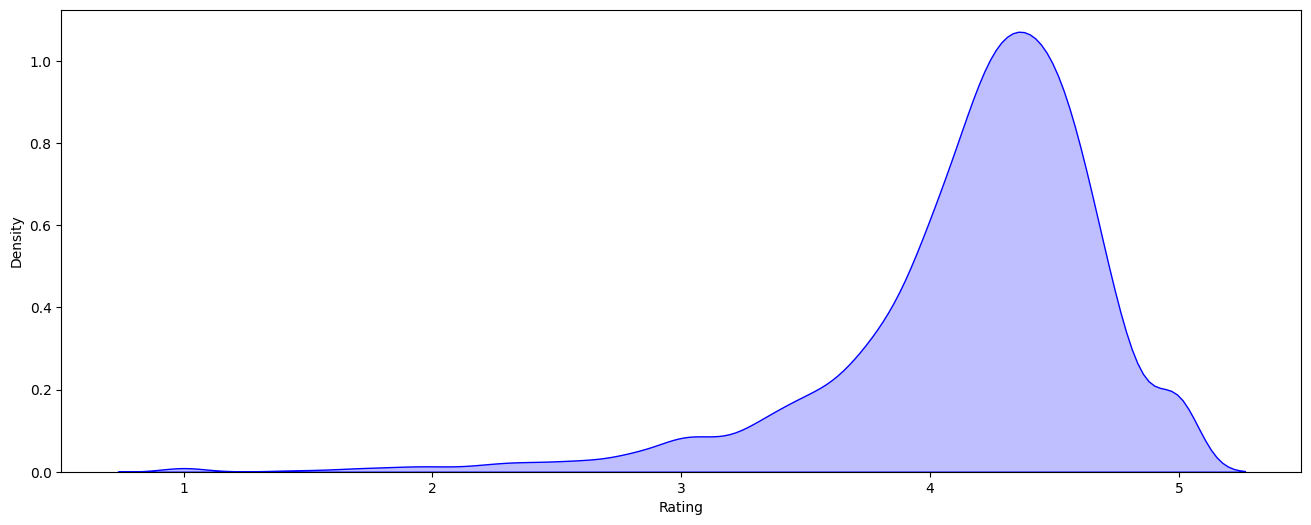

In [73]:
# Plot the rating distribution
plt.figure(figsize=(16, 6)) # make figure size
sns.kdeplot(df['Rating'], color="blue", shade=True) # plot the distribution plot

### **5. Which type has more number of installs?**

<Axes: xlabel='Installs', ylabel='Price'>

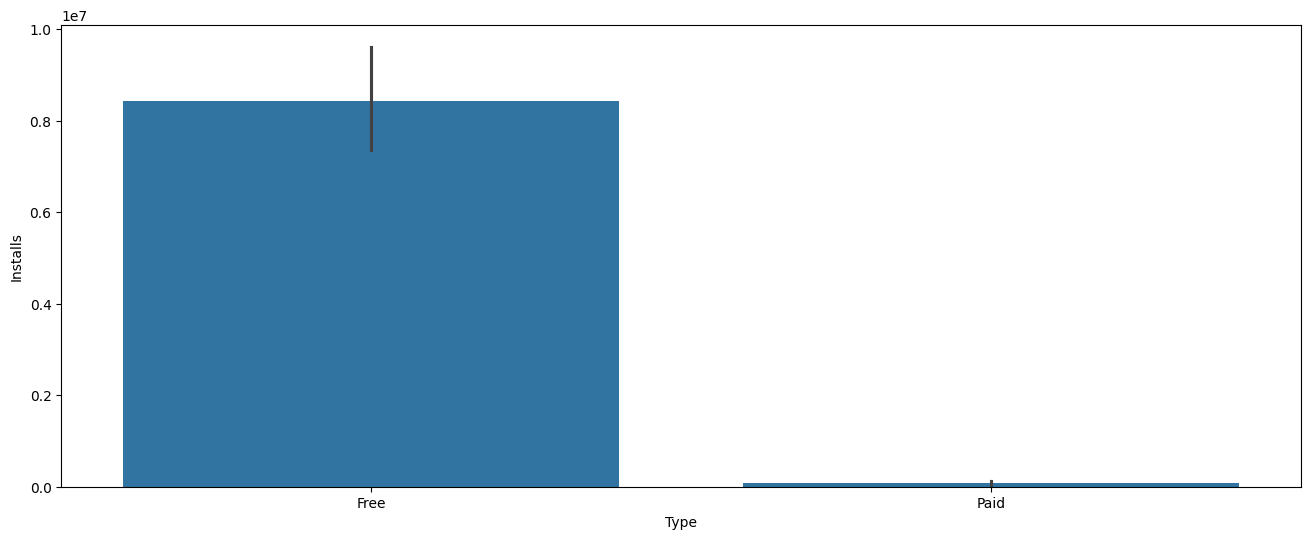

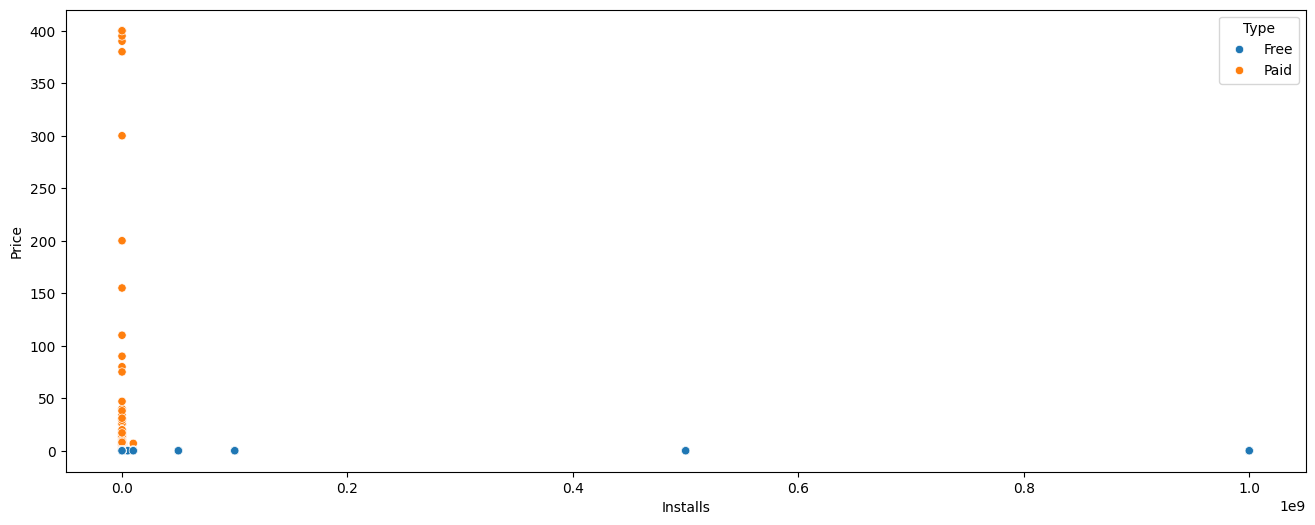

In [74]:
# Plot number of installs for free vs paid apps on a bar plot
plt.figure(figsize=(16, 6)) # make figure sizeccc
sns.barplot(x='Type', y='Installs', data=df) # plot the bar plot

# Show scatter plot as well where x-axis is Installs and y-axis is Price and hue is Type
plt.figure(figsize=(16, 6)) # make figure size
sns.scatterplot(x='Installs', y='Price', hue='Type', data=df) # plot the scatter plot

### **6. Which installs' category has the greatest size in megabytes?**

<Axes: xlabel='Installs_Category', ylabel='Size (MB)'>

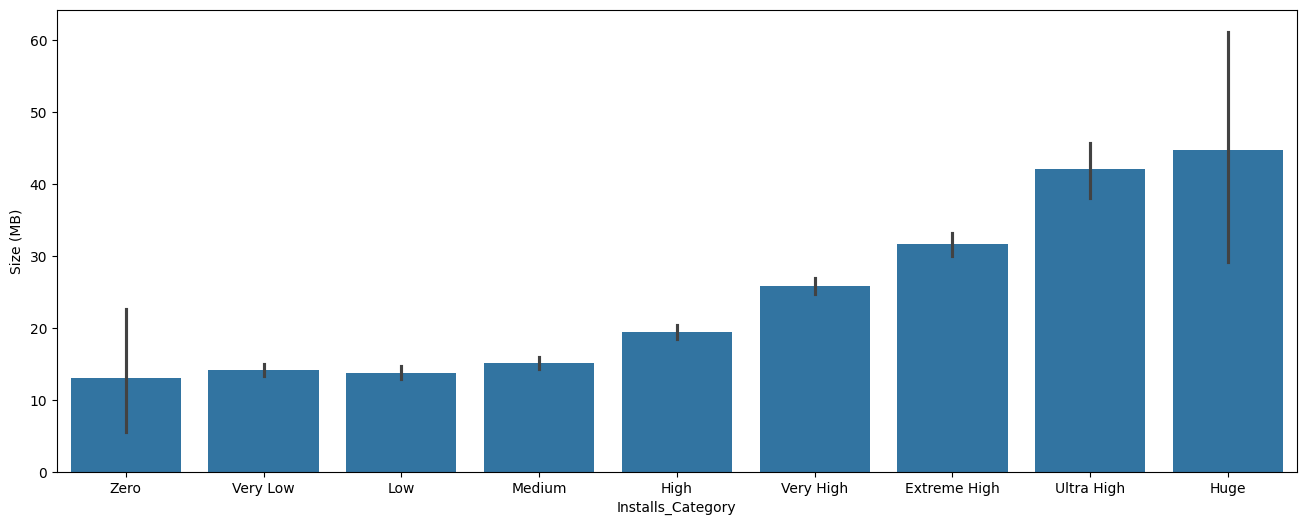

In [75]:
# Make a bar plot of Size (MB) vs Installs_Category
plt.figure(figsize=(16, 6)) # make figure size
sns.barplot(x='Installs_Category', y='Size (MB)', data=df) # plot the bar plot

### **7. Which content rating is the most popular?**

In [76]:
df['Content Rating'].value_counts() # this will show the value counts of each content rating

Content Rating
Everyone           7893
Teen               1036
Mature 17+          393
Everyone 10+        321
Adults only 18+       3
Unrated               2
Name: count, dtype: int64

<Axes: xlabel='Content Rating', ylabel='Installs'>

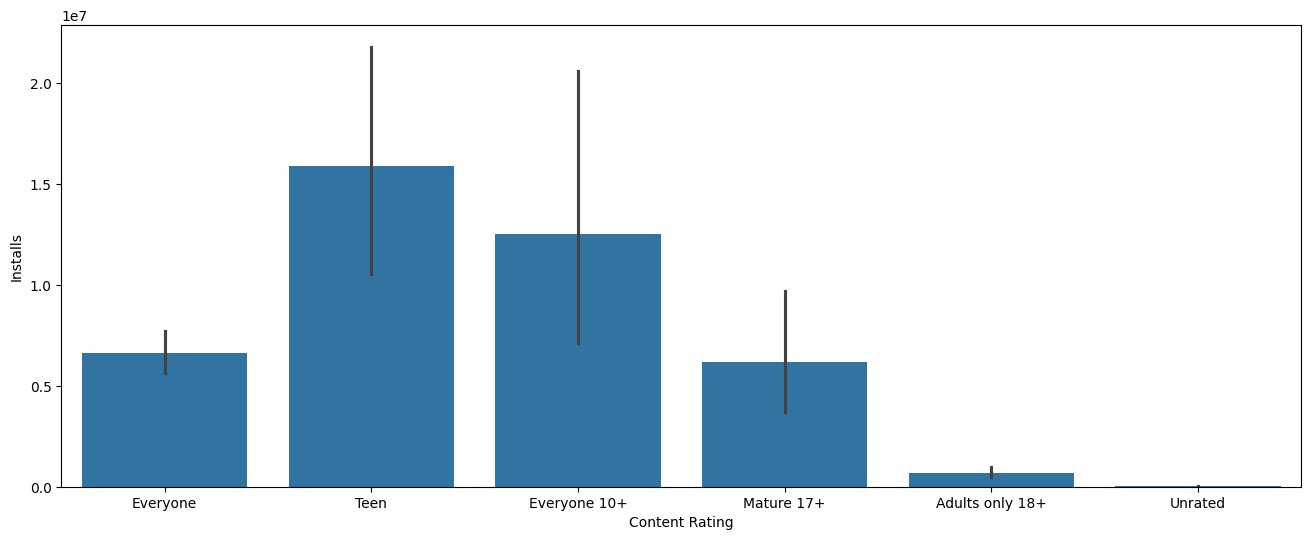

In [77]:
# Plot the bar plot of Content Rating vs Installs
plt.figure(figsize=(16, 6)) # make figure size
sns.barplot(x='Content Rating', y='Installs', data=df) # plot the bar plot

In [78]:
# Find how many apps in each category are there in Everyone content rating
df['Category'].loc[df['Content Rating'] == 'Everyone'].value_counts()

Category
FAMILY                 1428
TOOLS                   817
GAME                    493
BUSINESS                405
MEDICAL                 377
PRODUCTIVITY            363
FINANCE                 340
LIFESTYLE               333
PERSONALIZATION         309
SPORTS                  300
COMMUNICATION           280
PHOTOGRAPHY             268
HEALTH_AND_FITNESS      258
TRAVEL_AND_LOCAL        212
BOOKS_AND_REFERENCE     197
SHOPPING                172
NEWS_AND_MAGAZINES      168
VIDEO_PLAYERS           137
MAPS_AND_NAVIGATION     127
EDUCATION               112
FOOD_AND_DRINK          102
SOCIAL                   87
AUTO_AND_VEHICLES        83
LIBRARIES_AND_DEMO       83
WEATHER                  75
HOUSE_AND_HOME           72
ART_AND_DESIGN           59
PARENTING                58
EVENTS                   53
BEAUTY                   45
ENTERTAINMENT            37
COMICS                   26
DATING                   17
Name: count, dtype: int64

### **8. What are the top 5 rated paid apps?**

<Axes: xlabel='App', ylabel='Rating'>

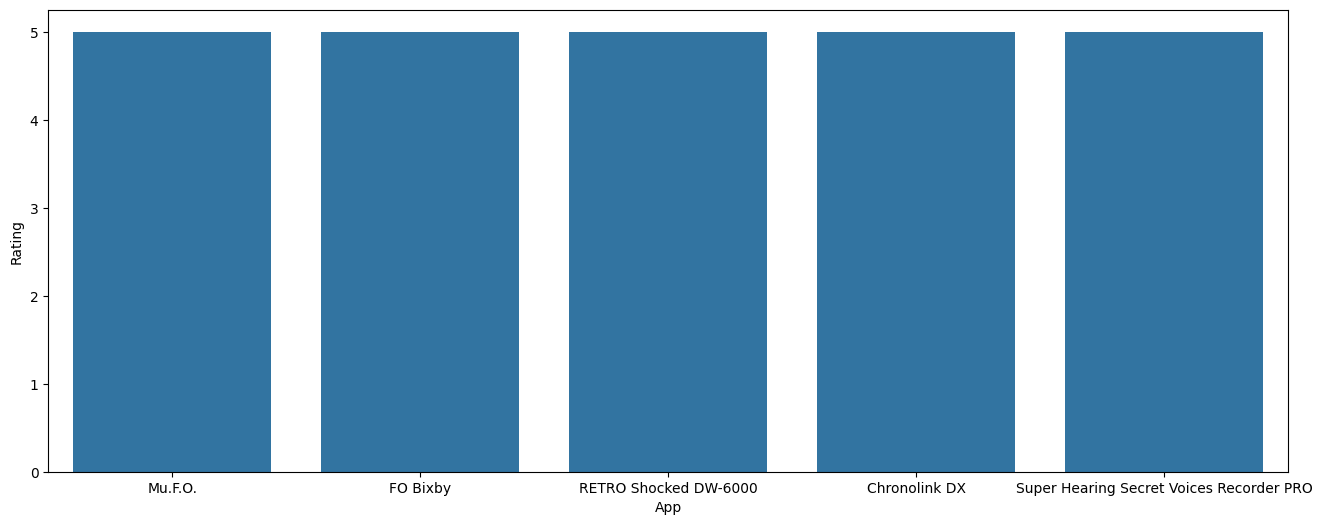

In [79]:
# Plot top 5 rated paid apps
plt.figure(figsize=(16, 6)) # make figure size
sns.barplot(x='App', y='Rating', data=df[df['Type'] == 'Paid'].sort_values(by='Rating', ascending=False).head(5)) # plot the bar plot

In [80]:
df[df['Type'] == 'Paid'].sort_values(by='Rating', ascending=False).head(5)

,App,Category,Rating,Reviews,Size (MB),Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs_Category
10697,Mu.F.O.,GAME,5.0,2,16.000000,1,Paid,0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up,Very Low
10690,FO Bixby,PERSONALIZATION,5.0,5,0.840820,100,Paid,0.99,Everyone,Personalization,"April 25, 2018",0.2,7.0 and up,Very Low
9010,RETRO Shocked DW-6000,PERSONALIZATION,5.0,13,0.488281,100,Paid,1.49,Everyone,Personalization,"April 4, 2017",1.2,2.3 and up,Very Low
9039,Chronolink DX,FAMILY,5.0,7,73.000000,10,Paid,0.99,Everyone,Puzzle,"July 6, 2017",1.2,4.1 and up,Very Low
2262,Super Hearing Secret Voices Recorder PRO,MEDICAL,5.0,3,23.000000,100,Paid,2.99,Everyone,Medical,"April 20, 2018",1.0,4.1 and up,Very Low


### **9. What are the top 5 rated free apps?**

<Axes: xlabel='App', ylabel='Rating'>

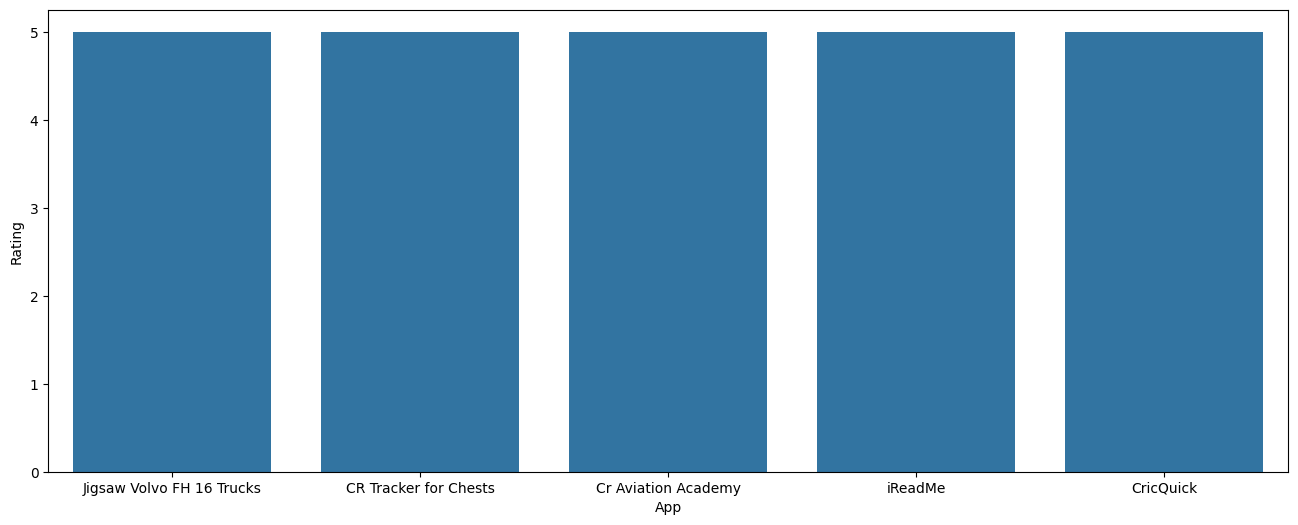

In [81]:
# Plot top rated 5 apps in free category
plt.figure(figsize=(16, 6)) # make figure size
sns.barplot(x='App', y='Rating', data=df[df['Type'] == 'Free'].sort_values(by='Rating', ascending=False).head(5)) # plot the bar plot

In [82]:
df[df['Type'] == 'Free'].sort_values(by='Rating', ascending=False).head(5)

,App,Category,Rating,Reviews,Size (MB),Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs_Category
10407,Jigsaw Volvo FH 16 Trucks,FAMILY,5.0,5,8.1,1000,Free,0.0,Teen,Puzzle,"December 1, 2016",1.0,4.0 and up,Low
7805,CR Tracker for Chests,TOOLS,5.0,6,4.5,50,Free,0.0,Everyone,Tools,"June 5, 2018",1.0.2,4.1 and up,Very Low
7799,Cr Aviation Academy,FAMILY,5.0,7,22.0,100,Free,0.0,Everyone,Education,"August 9, 2017",1.0,4.1 and up,Very Low
7756,iReadMe,PRODUCTIVITY,5.0,8,22.0,100,Free,0.0,Everyone,Productivity,"March 6, 2018",1.5,4.4 and up,Very Low
7754,CricQuick,SPORTS,5.0,17,1.5,50,Free,0.0,Everyone,Sports,"December 8, 2017",1.0,4.0.3 and up,Very Low


### **10. What are the top 5 free and paid apps with highest number of reviews?**

<Axes: xlabel='App', ylabel='Reviews'>

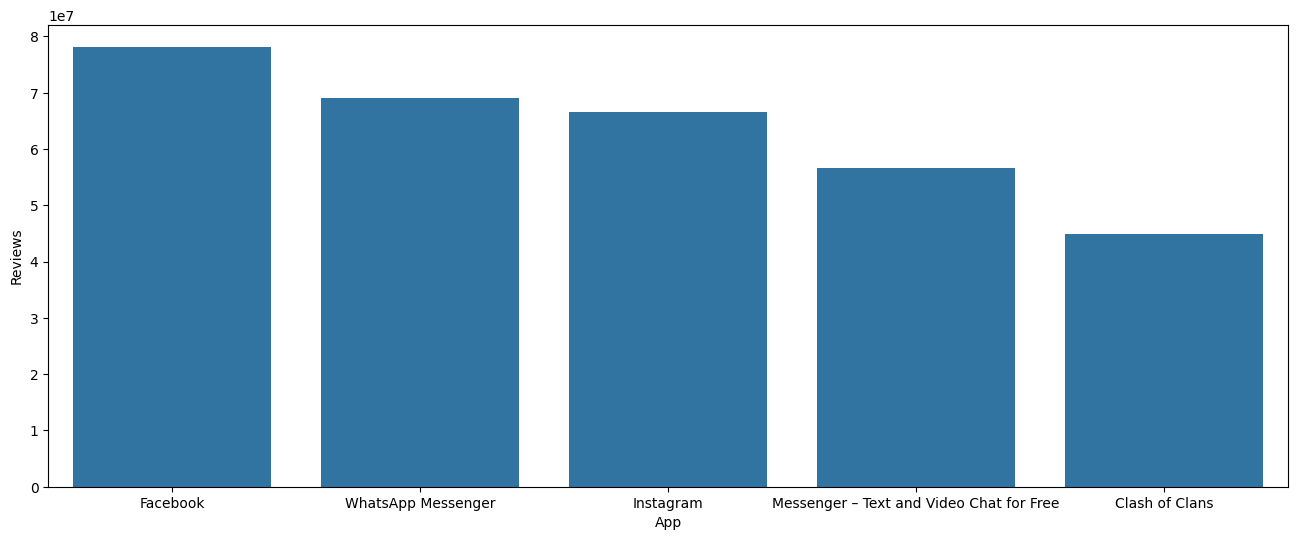

In [83]:
# Plot top 5 FREE apps with highest number of reviews
plt.figure(figsize=(16, 6)) # make figure size
sns.barplot(x='App', y='Reviews', data=df[df['Type'] == 'Free'].sort_values(by='Reviews', ascending=False).head(5)) # plot the bar plot

In [84]:
df[df['Type'] == 'Free'].sort_values(by='Reviews', ascending=False).head(5)

,App,Category,Rating,Reviews,Size (MB),Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs_Category
2544,Facebook,SOCIAL,4.1,78158306,NaN,1000000000,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device,Huge
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,NaN,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device,Huge
2545,Instagram,SOCIAL,4.5,66577313,NaN,1000000000,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,Varies with device,Huge
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,NaN,1000000000,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device,Huge
1670,Clash of Clans,GAME,4.6,44891723,98.0,100000000,Free,0.0,Everyone 10+,Strategy,"July 15, 2018",10.322.16,4.1 and up,Ultra High


<Axes: xlabel='App', ylabel='Reviews'>

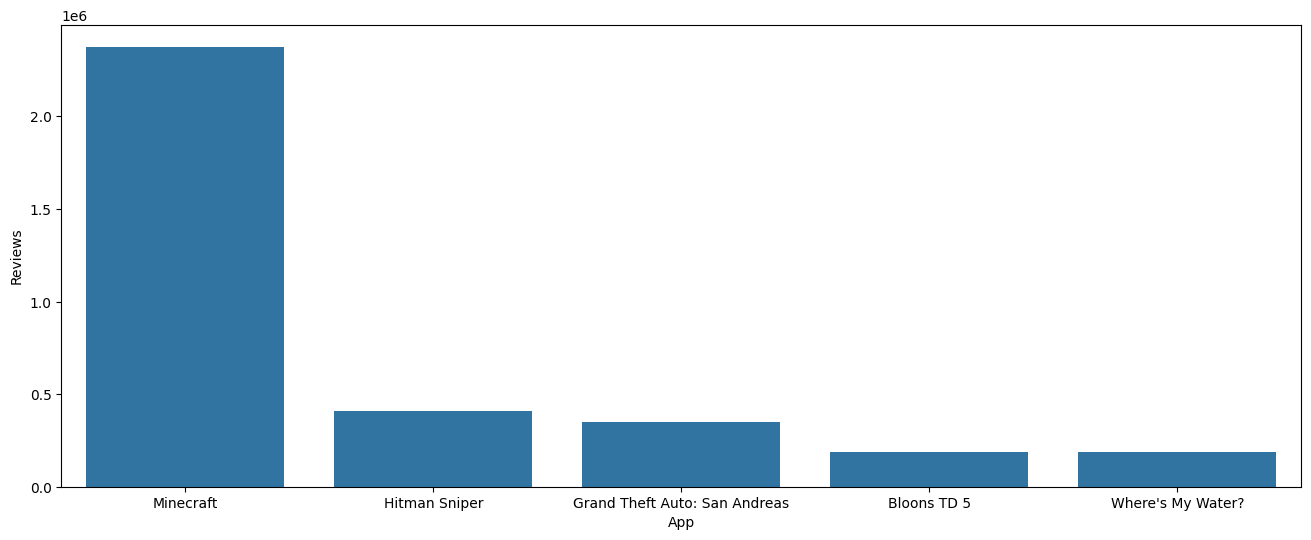

In [85]:
# Plot top 5 Paid apps with highest number of reviews
plt.figure(figsize=(16, 6)) # make figure size
sns.barplot(x='App', y='Reviews', data=df[df['Type'] == 'Paid'].sort_values(by='Reviews', ascending=False).head(5)) # plot the bar plot

## **Machine Learning: Predicting App Ratings**

Building upon our data exploration and cleaning, we'll now use this preprocessed data to create a machine learning model that predicts app ratings. This will allow us to identify which features are most important in determining an app's rating.

In [86]:
# Import additional libraries for machine learning
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

### **Feature Selection and Model Preparation**

In [87]:
# Check for NaN values
print("Columns with NaN values:")
print(df.isna().sum())

df['Rating'].fillna(df['Rating'].mean(), inplace=True)
df['Size (MB)'].fillna(df['Size (MB)'].mean(), inplace=True)

# Log transforming skewed features
df['Reviews_log'] = np.log1p(df['Reviews'])
df['Installs_log'] = np.log1p(df['Installs'])
df['Price_log'] = np.log1p(df['Price'])

# Adding interaction terms
df['Reviews_Installs'] = df['Reviews'] * df['Installs']

# Feature Selection
features = ['Category', 'Reviews', 'Size (MB)', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres']
X = pd.get_dummies(df[features], columns=['Category', 'Type', 'Content Rating', 'Genres'])
y = df['Rating']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\nTraining set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Columns with NaN values:
App                     0
Category                0
Rating               1458
Reviews                 0
Size (MB)            1226
Installs                0
Type                    0
Price                   0
Content Rating          0
Genres                  0
Last Updated            0
Current Ver             0
Android Ver             0
Installs_Category       0
dtype: int64

Training set shape: (7718, 163)
Testing set shape: (1930, 163)


**Observations:**
- We checked for and handled any remaining NaN values in the 'Rating' column.
- We've selected relevant features for our model, including both numerical and categorical variables.
- Categorical variables have been one-hot encoded to be usable in our model.
- The data has been split into training (80%) and testing (20%) sets.
- Features have been scaled to ensure all variables are on the same scale, which is important for many machine learning algorithms.

### **Model Training**

In [88]:
# 4. Model Training
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)

print("Model training completed.")

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Model training completed.


**Observations:**
- We've used a Random Forest Regressor with 100 trees.
- Random Forests are ensemble learning methods that operate by constructing multiple decision trees and outputting the mean prediction of the individual trees.
- They're known for their high accuracy and ability to handle large datasets with higher dimensionality.

### **Model Evaluation**

Mean Squared Error: 0.2101
R-squared Score: 0.1136

Top 10 Most Important Features:
                         feature  importance
0                        Reviews    0.396945
2                       Installs    0.192922
1                      Size (MB)    0.163419
3                          Price    0.040479
33                Category_TOOLS    0.015448
152                 Genres_Tools    0.014380
83              Genres_Education    0.010502
106      Genres_Health & Fitness    0.010466
19   Category_HEALTH_AND_FITNESS    0.010367
15               Category_FAMILY    0.009181


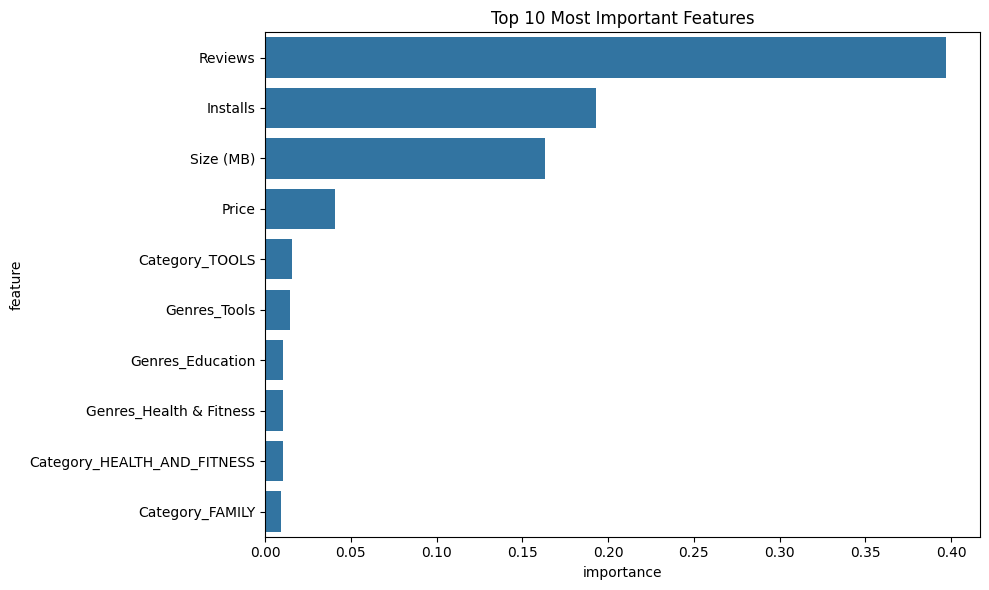

In [89]:
# 5. Model Evaluation
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared Score: {r2:.4f}")

# Feature Importance
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': best_rf.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False).head(10)
print("\nTop 10 Most Important Features:")
print(feature_importance)

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Top 10 Most Important Features')
plt.tight_layout()
plt.show()

**Observations:**
- Reviews, Installs, and Size (MB) are the most influential features in the model, with Reviews having the highest impact.
- The Mean Squared Error (MSE) of 0.2101 indicates a moderate level of prediction accuracy.
- The low R-squared score of 0.1136 suggests that the model explains only a small portion of the target's variance, indicating room for improvement.
- Specific app categories and genres like "Tools" and "Health & Fitness" contribute to predictions, but their impact is relatively minor compared to the top features.

## **Conclusion**

This exploratory data analysis provided valuable insights into the characteristics and user engagement of apps on the Google Play Store. Key findings reveal that while high ratings are common, the number of reviews varies widely, potentially indicating varying levels of user satisfaction or popularity. Additionally, the predominance of free apps and "Everyone"-rated apps suggest a broad and accessible app ecosystem. These insights lay the groundwork for further analysis, such as predictive modeling or deeper trend analysis, to understand factors that influence app success on the Google Play Store.